In [1]:
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


Condiciones iniciales del problema.

In [2]:
q=-1.602176565E-19
v_0=3.0E5
theta_0=0
B=-10**(-4)
m=9.1093829E-31
N=1000

Cálculo del tiempo que tarda la partícula en volver a cruzar el eje $x$ teóricamente t definición del intervalo de tiempo a observar.

In [3]:
def tiempo(q,B,theta_0, m,N):
    t_max=(m/(q*B))*(2*theta_0+math.pi)
    dt=t_max/N
    t=np.arange(0,t_max+dt,dt)
    return t, t_max
time,t_max=tiempo(q,B,theta_0, m,N)
print("El tiempo total del recorrido teóricamente hasta llegar al detector es {}.".format(t_max))

El tiempo total del recorrido teóricamente hasta llegar al detector es 1.7861932962036851e-07.


Ecuaciones de posición teóricas respecto al tiempo $t$ para $\theta_0$ arbitrario y na velocidad $v_0$ de entrada.

In [4]:
def posicion(q,B,v_0,theta_0,m,t):
    omega=q*B/m
    x=-v_0*np.cos(theta_0-omega*t)/omega+v_0*np.cos(theta_0)/omega
    y=-v_0*np.sin(theta_0-omega*t)/omega+v_0*np.sin(theta_0)/omega
    return x,y

Gráfica del recorrido circular de una partícula de carga $q$ que incide en el eje $x$ con rapidez $v_0$ y ángulo de incidencia $\theta_0=0,$debido a un campo $\mathbf{B}$ perpendicular.

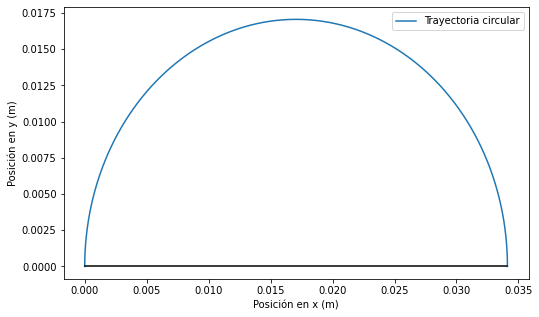

In [5]:
plt.figure(figsize=(50/6,5))
xTeo,yTeo=posicion(q,B,v_0,theta_0,m,time)
plt.plot(xTeo,yTeo, label="Trayectoria circular")
plt.plot(xTeo,np.zeros(len(xTeo)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")
plt.savefig("recorridoTeorico.jpg")

Cálculo de la posición final de la partícula al llegar al detector, es decir el punto en el que la trayectoria cruza el eje $x$ nuevamente.

In [6]:
x_max, y_max=posicion(q,B,v_0,theta_0,m,t_max)
print("Teóricamente a partícula alcanza el detector cuando este se encuentra en x={}m y y={}m.".format(x_max,y_max))

Teóricamente a partícula alcanza el detector cuando este se encuentra en x=0.0341137790890107m y y=9.663647118728019e-18m.


Cálculo del momento inicial $p_0=mv_0$, final $p_f=\frac{1}{2}qBx$ y la diferencia de momento que comprueba la conservación del momento lineal.

In [7]:
p_0=m*v_0
p_f=0.5*q*B*x_max
dp=np.abs(p_f-p_0)
print("El momento inicial de la partícula es {} kg m/s, el momento final es {} kg m/s y la diferencia de momento es {} kg m/s.".format(p_0,p_f,dp))

El momento inicial de la partícula es 2.73281487e-25 kg m/s, el momento final es 2.73281487e-25 kg m/s y la diferencia de momento es 0.0 kg m/s.


Definición de la función de trayectoria de la partícula que incide con rapidez $v_0$ y ángulo $\theta_0$ a una región de campo magnético erpendicular $\mathbf{B}$; siguiendo el paso a paso de Feynmann.

In [8]:
def pasoApaso(q,B,v_0,theta_0,m,N):
    t=0.0
    omega=q*B/m
    dt=1/(omega*N)
    x=[0]
    y=[0]
    v_x=-v_0*np.sin(theta_0)
    v_y=v_0*np.cos(theta_0)
    while y[-1]>=0:
        a_x=omega*v_y
        a_y=-omega*v_x
        x_new=x[-1]+v_x*dt
        y_new=y[-1]+v_y*dt
        x.append(x_new)
        y.append(y_new)
        v_x=v_x+a_x*dt
        v_y=v_y+a_y*dt
        t=t+dt
    x=np.array(x)
    y=np.array(y)
    return x,y,t

Gráfica de la trayectoria circular por medio del Método de Feynmann de una partícula de carga $q$ que incide en el eje $x$ con rapidez $v_0$ y ángulo de incidencia $\theta_0=0,$debido a un campo $\mathbf{B}$ perpendicular.

Text(0, 0.5, 'Posición en y (m)')

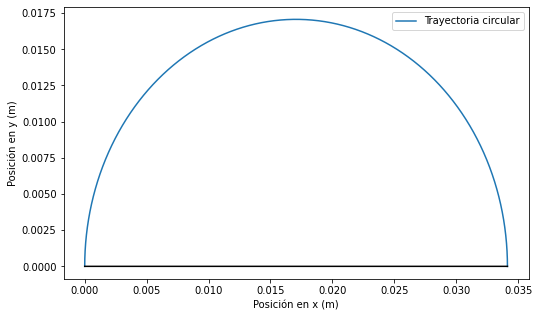

In [9]:
plt.figure(figsize=(50/6,5))
xF,yF,t_maxF=pasoApaso(q,B,v_0,theta_0,m,N)
plt.plot(xF,yF, label="Trayectoria circular")
plt.plot(xF,np.zeros(len(xF)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")

Cálculo numérico de la posición final de la partícula al llegar al detector.

In [10]:
xF_max=xF[-1]
yF_max=yF[-1]
print("Mediante el Método de Feynmann la partícula alcanza el detector cuando este se encuentra en x={}m y y={}m.".format(xF_max,yF_max))

Mediante el Método de Feynmann la partícula alcanza el detector cuando este se encuentra en x=0.034140595098563806m y y=-6.941094188839311e-06m.


Cálculo del momento inicial $p_0=mv_0$, final $p_f=\frac{1}{2}qBx$ y la diferencia de momento que comprueba la conservación del momento lineal.

In [11]:
pF_0=m*v_0
pF_f=0.5*q*B*xF_max
dpF=np.abs(pF_f-pF_0)
print("El momento inicial de la partícula es {} kg m/s, el momento final es {} kg m/s y la diferencia de momento es {} kg m/s.".format(pF_0,pF_f,dpF))

El momento inicial de la partícula es 2.73281487e-25 kg m/s, el momento final es 2.7349630691036404e-25 kg m/s y la diferencia de momento es 2.1481991036404736e-28 kg m/s.


Definición de cambio en la velocidad y la función de trayectoria de la partícula que incide con rapidez $v_0$ y ángulo $\theta_0$ a una región de campo magnético erpendicular $\mathbf{B}$; siguiendo el paso a paso del Método de Runge Kutta de cuarto orden.

In [12]:
def delta(omega,v_x,v_y,dt):
    delta11=dt*omega*v_y
    delta12=dt*omega*(v_y+delta11/2)
    delta13=dt*omega*(v_y+delta12/2)
    delta14=dt*omega*(v_y+delta13)
    delta1=(delta11+2*delta12+2*delta13+delta14)/6
    delta21=-dt*omega*v_x
    delta22=-dt*omega*(v_x+delta21/2)
    delta23=-dt*omega*(v_x+delta22/2)
    delta24=-dt*omega*(v_x+delta23)
    delta2=(delta21+2*delta22+2*delta23+delta24)/6
    return delta1, delta2

def rungePaso(q,B,v_0,theta_0,m,N):
    t=0.0
    omega=q*B/m
    dt=1/(omega*N)
    x=[0]
    y=[0]
    v_x=-v_0*np.sin(theta_0)
    v_y=v_0*np.cos(theta_0)
    while y[-1]>=0:
        x_new=x[-1]+v_x*dt
        y_new=y[-1]+v_y*dt
        x.append(x_new)
        y.append(y_new)
        v_x=v_x+delta(omega,v_x,v_y,dt)[0]
        v_y=v_y+delta(omega,v_x,v_y,dt)[1]
        t=t+dt
    x=np.array(x)
    y=np.array(y)
    return x,y,t

Gráfica de la trayectoria circular por medio del Método de Runge Kutta 4 de una partícula de carga $q$ que incide en el eje $x$ con rapidez $v_0$ y ángulo de incidencia $\theta_0=0,$debido a un campo $\mathbf{B}$ perpendicular.

Text(0, 0.5, 'Posición en y (m)')

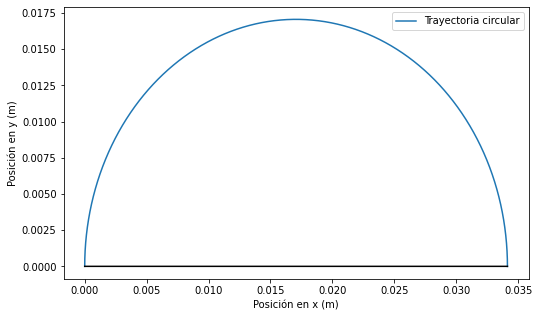

In [13]:
plt.figure(figsize=(50/6,5))
xR,yR,t_maxR=rungePaso(q,B,v_0,theta_0,m,N)
plt.plot(xR,yR, label="Trayectoria circular")
plt.plot(xR,np.zeros(len(xR)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")

Cálculo numérico de la posición final de la partícula al llegar al detector.

In [14]:
xR_max=xR[-1]
yR_max=yR[-1]
print("Mediante el Método de Runge Kutta 4 la partícula alcanza el detector cuando este se encuentra en x={}m y y={}m.".format(xR_max,yR_max))

Mediante el Método de Runge Kutta 4 la partícula alcanza el detector cuando este se encuentra en x=0.03413084088171104m y y=-6.952529174398728e-06m.


Cálculo del momento inicial $p_0=mv_0$, final $p_f=\frac{1}{2}qBx$ y la diferencia de momento que comprueba la conservación del momento lineal.

In [15]:
pR_0=m*v_0
pR_f=0.5*q*B*xR_max
dpR=np.abs(pR_f-pR_0)
print("El momento inicial de la partícula es {} kg m/s, el momento final es {} kg m/s y la diferencia de momento es {} kg m/s.".format(pR_0,pR_f,dpR))

El momento inicial de la partícula es 2.73281487e-25 kg m/s, el momento final es 2.7341816702210685e-25 kg m/s y la diferencia de momento es 1.3668002210685885e-28 kg m/s.


Comparación gráfica de los métodos numéricos para $\theta_0=0$.

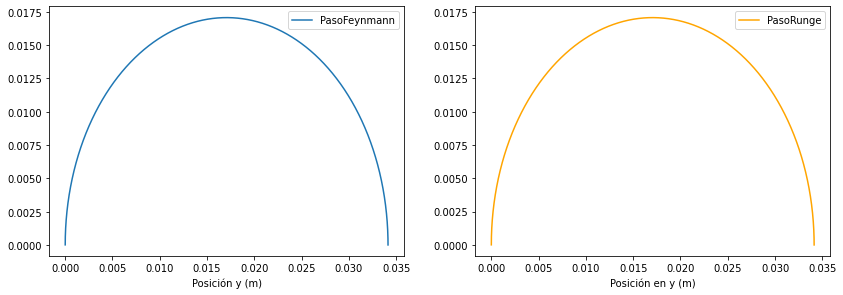

In [16]:
plt.figure(figsize=(14,4.6))
plt.title("Recorridos de partículas con carga {}C, masa {}kg, velocidad {}m/s, ángulo de entrada {}rad, debidas a un campo perpendicular B={}T.".format(q,m,v_0,theta_0,B))
plt.subplot(1,2,1)
plt.plot(xF,yF, label="PasoFeynmann")
plt.legend()
plt.xlabel("Posición x (m)")
plt.xlabel("Posición y (m)")
plt.subplot(1,2,2)
plt.plot(xR,yR, label="PasoRunge",c="orange")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.xlabel("Posición en y (m)")
plt.savefig("recorridos.jpg")

Comparación del error en el cálculo del momento final $Error=\frac{|p_f-p_0|}{p_0}*100%$ de las partículas mediante el método de Feynmann y de Runge Kutta 4 para $N=1000$. 

In [17]:
errorF=dpF*100/p_0
errorR=dpR*100/p_0
print("El error porcentual en la conservación para el método de Feynmann fue de {}%, mientras que para el método de Runge Kutta 4 fue de {}%".format(errorF,errorR))

El error porcentual en la conservación para el método de Feynmann fue de 0.07860756054948112%, mientras que para el método de Runge Kutta 4 fue de 0.05001437294830691%


Comportameinto del momento final para los métodos de Feynmann y Runge Kutta 4 a medida que aumenta $N$

In [18]:
N=np.array([100,200,500,1000,1500])
def momentoVsN(q,B,v_0,theta_0,m,N):
    xF=np.zeros(len(N))
    xR=np.zeros(len(N))
    for i in range(len(N)):
        xF[i]=pasoApaso(q,B,v_0,theta_0,m,N[i])[0][-1]
        xR[i]=rungePaso(q,B,v_0,theta_0,m,N[i])[0][-1]
    pF=0.5*q*B*xF
    pR=0.5*q*B*xR
    p0=m*v_0
    errF=np.abs(pF-p0)*100/p0
    errR=np.abs(pR-p0)*100/p0
    return pF,pR,errF,errR
pF,pR,errF,errR=momentoVsN(q,B,v_0,theta_0,m,N)
print("Para los N={} los momentos finales obtenidos fueron: para el Método de Feynmann {} y para el Método de Runge Kutta 4 {}, respectivamente a cada N. Con error en el cálculo respectivo de {} para el método de Feynmann y de {} para el método de Runge Kutta 4.".format(N,pF,pR,errF,errR))

Para los N=[ 100  200  500 1000 1500] los momentos finales obtenidos fueron: para el Método de Feynmann [2.75445722e-25 2.74359259e-25 2.73711475e-25 2.73496307e-25
 2.73424659e-25] y para el Método de Runge Kutta 4 [2.74651079e-25 2.73965631e-25 2.73554904e-25 2.73418167e-25
 2.73372598e-25], respectivamente a cada N. Con error en el cálculo respectivo de [0.79194368 0.39438152 0.15734267 0.07860756 0.05238994] para el método de Feynmann y de [0.50116528 0.25034404 0.1000496  0.05001437 0.03333968] para el método de Runge Kutta 4.


Gráficas del comportamiento del momento final de las partículas al llegar al detector y el error en términos del momento de los métodos numéricos.

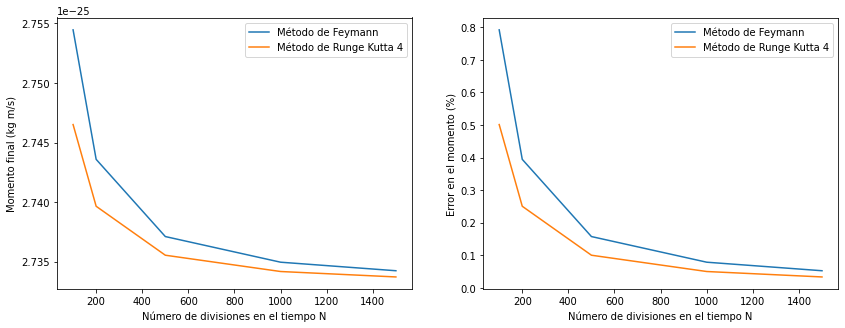

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(N,pF, label="Método de Feymann")
plt.plot(N,pR, label="Método de Runge Kutta 4")
#plt.title("Momento final de las partículas en función del número de repeticiones N")
plt.xlabel("Número de divisiones en el tiempo N")
plt.ylabel("Momento final (kg m/s)")
plt.legend()
plt.subplot(1,2,2)
plt.plot(N,errF, label="Método de Feymann")
plt.plot(N,errR, label="Método de Runge Kutta 4")
#plt.title("Error en el momento de las partículas en función del número de repeticiones N")
plt.xlabel("Número de divisiones en el tiempo N")
plt.ylabel("Error en el momento (%)")
plt.legend()
plt.savefig("analisisMomentosN.jpg")

Comportamiento teórico del alcance máximo o posición en x final de la partícula con respecto a $\theta_0.$

In [20]:
def xFinalVsTheta(q,B,theta0, m,N):
    xFinal=np.zeros(len(theta0))
    for i in range(len(theta0)):
        tmax=tiempo(q,B,theta0[i], m,N)[1]
        xFinal[i]=posicion(q,B,v_0,theta0[i],m,tmax)[0]
    return xFinal    

Gráfica de la posición en x final en función del ángulo de incidencia $\theta_0$.

Text(0, 0.5, 'Posición final en x (m)')

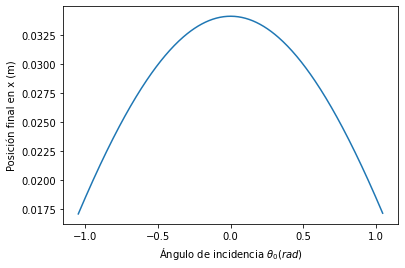

In [21]:
N=1000
plt.figure()
theta0=np.arange(-np.pi/3,np.pi/3,2*np.pi/N)
xFinal=xFinalVsTheta(q,B,theta0, m,N)
plt.plot(theta0,xFinal)
plt.xlabel("Ángulo de incidencia "+ r"$\theta_0(rad)$")
plt.ylabel("Posición final en x (m)")

Trayectorias de enfoque con Runge Kutta 4 y $N=1000$ para los ángulos $\theta_0=0$, $\theta_0=\frac{\pi}{8}$ y $\theta_0=-\frac{\pi}{8}$ 

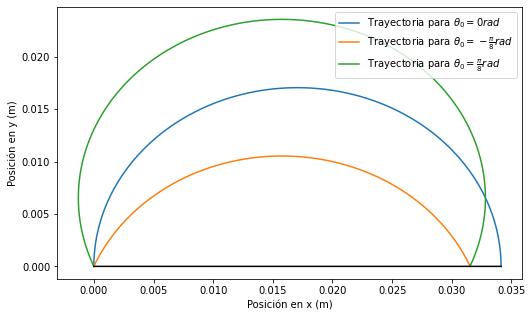

In [22]:
plt.figure(figsize=(50/6,5))
theta=[0,-np.pi/8,np.pi/8]
xR0,yR0,t_maxR0=rungePaso(q,B,v_0,theta[0],m,N)
xR1,yR1,t_maxR1=rungePaso(q,B,v_0,theta[1],m,N)
xR2,yR2,t_maxR2=rungePaso(q,B,v_0,theta[2],m,N)
plt.plot(xR0,yR0, label="Trayectoria para "+r"$\theta_0={} rad$".format(theta[0]))
plt.plot(xR1,yR1, label="Trayectoria para "+r"$\theta_0=-\frac{\pi}{8} rad$")
plt.plot(xR2,yR2, label="Trayectoria para "+r"$\theta_0=\frac{\pi}{8} rad $")
plt.plot(xR0,np.zeros(len(xR0)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")
plt.savefig("propiedadEnfoque.jpg")

Definición de la función de alcance en x final en función de $\theta_0$ para el Método de Runge Kutta 4 con $N=1000$

In [23]:
def xFinalVsThetaRK4(q,B,theta0, m,N):
    xFinal=np.zeros(len(theta0))
    for i in range(len(theta0)):
        xFinal[i]=rungePaso(q,B,v_0,theta0[i],m,N)[0][-1]
    return xFinal   

Gráfica de la posición en x final en función del ángulo de incidencia $\theta_0$ con el Método Runge Kutta 4.

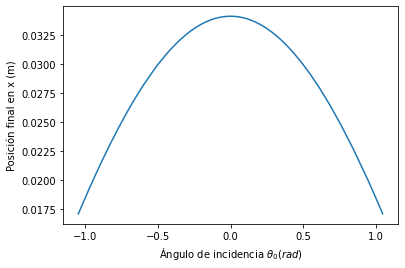

In [24]:
plt.figure()
theta0=np.arange(-np.pi/3,np.pi/3,2*np.pi/N)
xFinalRK4=xFinalVsThetaRK4(q,B,theta0, m,N)
plt.plot(theta0,xFinalRK4)
plt.xlabel("Ángulo de incidencia "+ r"$\theta_0(rad)$")
plt.ylabel("Posición final en x (m)")
plt.savefig("xFinalVSTheta0.jpg")

Datos para algunos ángulos de incidencia para ver la igualdad en la propiedad de enfoque

In [32]:
thetaPos=np.arange(0,1,0.1)
xFinalPos=xFinalVsThetaRK4(q,B,thetaPos, m,N)
thetaNeg=-thetaPos
xFinalNeg=xFinalVsThetaRK4(q,B,thetaNeg, m,N)
print(xFinalPos,xFinalNeg)
print(thetaPos,thetaNeg)

[0.03413084 0.03395778 0.0334452  0.03259836 0.03142586 0.02993956
 0.02815442 0.02608838 0.02376214 0.02119895] [0.03413084 0.03396254 0.03345447 0.03261167 0.03144919 0.029967
 0.02818503 0.02612119 0.02379623 0.02123354]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [-0.  -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9]


In [33]:
diff=np.zeros(len(xFinalPos))
for i in range(len(xFinalPos)):
    diff[i]=np.abs(xFinalPos[i]-xFinalNeg[i])
diff

array([0.00000000e+00, 4.75962929e-06, 9.27176926e-06, 1.33092629e-05,
       2.33276985e-05, 2.74422563e-05, 3.06074566e-05, 3.28075795e-05,
       3.40954371e-05, 3.45851652e-05])